## Part 1 - Prepare Medicare Payment Data

In this notebook, we will:
- Read multiple large data files using Dask
- Clean the data by: 
    - dropping existing columns
    - adding new columns
    - renaming columns
    - change categories of a column
    - change data types
- Combine datasets and then compute in dask
- Basic exploration and missing value determination
- Export data into multiple csv files

In [2]:
# Import Dask for reading and processing big data
import dask.dataframe as dd

# Import Pandas for data exploration
import pandas as pd
pd.set_option('display.max_columns',500)

# Import plotting libraries
%matplotlib inline
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries to time and output
import time
import os

### Read the Data

The dataset is split into 5 different text files for each year from 2012 - 2016. We will read each file and confirm if they all have the same attributes.

In [3]:
df2016 = dd.read_csv('Medicare_Provider_Util_Payment_PUF_CY2016.txt', sep='\t',dtype=str)

In [4]:
print(df2016.columns)
print(len(df2016.columns))

Index(['NPI', 'NPPES_PROVIDER_LAST_ORG_NAME', 'NPPES_PROVIDER_FIRST_NAME',
       'NPPES_PROVIDER_MI', 'NPPES_CREDENTIALS', 'NPPES_PROVIDER_GENDER',
       'NPPES_ENTITY_CODE', 'NPPES_PROVIDER_STREET1', 'NPPES_PROVIDER_STREET2',
       'NPPES_PROVIDER_CITY', 'NPPES_PROVIDER_ZIP', 'NPPES_PROVIDER_STATE',
       'NPPES_PROVIDER_COUNTRY', 'PROVIDER_TYPE',
       'MEDICARE_PARTICIPATION_INDICATOR', 'PLACE_OF_SERVICE', 'HCPCS_CODE',
       'HCPCS_DESCRIPTION', 'HCPCS_DRUG_INDICATOR', 'LINE_SRVC_CNT',
       'BENE_UNIQUE_CNT', 'BENE_DAY_SRVC_CNT', 'AVERAGE_MEDICARE_ALLOWED_AMT',
       'AVERAGE_SUBMITTED_CHRG_AMT', 'AVERAGE_MEDICARE_PAYMENT_AMT',
       'AVERAGE_MEDICARE_STANDARD_AMT'],
      dtype='object')
26


In [5]:
df2015 = dd.read_csv('Medicare_Provider_Util_Payment_PUF_CY2015.txt', sep='\t',dtype=str)

In [6]:
print(df2015.columns)
print(len(df2015.columns))

Index(['npi', 'nppes_provider_last_org_name', 'nppes_provider_first_name',
       'nppes_provider_mi', 'nppes_credentials', 'nppes_provider_gender',
       'nppes_entity_code', 'nppes_provider_street1', 'nppes_provider_street2',
       'nppes_provider_city', 'nppes_provider_zip', 'nppes_provider_state',
       'nppes_provider_country', 'provider_type',
       'medicare_participation_indicator', 'place_of_service', 'hcpcs_code',
       'hcpcs_description', 'hcpcs_drug_indicator', 'line_srvc_cnt',
       'bene_unique_cnt', 'bene_day_srvc_cnt', 'average_Medicare_allowed_amt',
       'average_submitted_chrg_amt', 'average_Medicare_payment_amt',
       'average_Medicare_standard_amt'],
      dtype='object')
26


In [7]:
df2014 = dd.read_csv('Medicare_Provider_Util_Payment_PUF_CY2014.txt', sep='\t',dtype=str)

In [8]:
print(df2014.columns)
print(len(df2014.columns))

Index(['npi', 'nppes_provider_last_org_name', 'nppes_provider_first_name',
       'nppes_provider_mi', 'nppes_credentials', 'nppes_provider_gender',
       'nppes_entity_code', 'nppes_provider_street1', 'nppes_provider_street2',
       'nppes_provider_city', 'nppes_provider_zip', 'nppes_provider_state',
       'nppes_provider_country', 'provider_type',
       'medicare_participation_indicator', 'place_of_service', 'hcpcs_code',
       'hcpcs_description', 'hcpcs_drug_indicator', 'line_srvc_cnt',
       'bene_unique_cnt', 'bene_day_srvc_cnt', 'average_Medicare_allowed_amt',
       'average_submitted_chrg_amt', 'average_Medicare_payment_amt',
       'average_Medicare_standard_amt'],
      dtype='object')
26


In [9]:
df2013 = dd.read_csv('Medicare_Provider_Util_Payment_PUF_CY2013.txt', sep='\t',dtype=str)

In [10]:
print(df2013.columns)
print(len(df2013.columns))

Index(['NPI', 'NPPES_PROVIDER_LAST_ORG_NAME', 'NPPES_PROVIDER_FIRST_NAME',
       'NPPES_PROVIDER_MI', 'NPPES_CREDENTIALS', 'NPPES_PROVIDER_GENDER',
       'NPPES_ENTITY_CODE', 'NPPES_PROVIDER_STREET1', 'NPPES_PROVIDER_STREET2',
       'NPPES_PROVIDER_CITY', 'NPPES_PROVIDER_ZIP', 'NPPES_PROVIDER_STATE',
       'NPPES_PROVIDER_COUNTRY', 'PROVIDER_TYPE',
       'MEDICARE_PARTICIPATION_INDICATOR', 'PLACE_OF_SERVICE', 'HCPCS_CODE',
       'HCPCS_DESCRIPTION', 'HCPCS_DRUG_INDICATOR', 'LINE_SRVC_CNT',
       'BENE_UNIQUE_CNT', 'BENE_DAY_SRVC_CNT', 'AVERAGE_MEDICARE_ALLOWED_AMT',
       'STDEV_MEDICARE_ALLOWED_AMT', 'AVERAGE_SUBMITTED_CHRG_AMT',
       'STDEV_SUBMITTED_CHRG_AMT', 'AVERAGE_MEDICARE_PAYMENT_AMT',
       'STDEV_MEDICARE_PAYMENT_AMT'],
      dtype='object')
28


In [11]:
df2012 = dd.read_csv('Medicare_Provider_Util_Payment_PUF_CY2012.txt', sep='\t',dtype=str)

In [12]:
print(df2012.columns)
print(len(df2012.columns))

Index(['NPI', 'NPPES_PROVIDER_LAST_ORG_NAME', 'NPPES_PROVIDER_FIRST_NAME',
       'NPPES_PROVIDER_MI', 'NPPES_CREDENTIALS', 'NPPES_PROVIDER_GENDER',
       'NPPES_ENTITY_CODE', 'NPPES_PROVIDER_STREET1', 'NPPES_PROVIDER_STREET2',
       'NPPES_PROVIDER_CITY', 'NPPES_PROVIDER_ZIP', 'NPPES_PROVIDER_STATE',
       'NPPES_PROVIDER_COUNTRY', 'PROVIDER_TYPE',
       'MEDICARE_PARTICIPATION_INDICATOR', 'PLACE_OF_SERVICE', 'HCPCS_CODE',
       'HCPCS_DESCRIPTION', 'HCPCS_DRUG_INDICATOR', 'LINE_SRVC_CNT',
       'BENE_UNIQUE_CNT', 'BENE_DAY_SRVC_CNT', 'AVERAGE_MEDICARE_ALLOWED_AMT',
       'STDEV_MEDICARE_ALLOWED_AMT', 'AVERAGE_SUBMITTED_CHRG_AMT',
       'STDEV_SUBMITTED_CHRG_AMT', 'AVERAGE_MEDICARE_PAYMENT_AMT',
       'STDEV_MEDICARE_PAYMENT_AMT'],
      dtype='object')
28


We can see that the datasets for 2012 and 2013 do not have the `average_Medicare_standard_amt` and they have 3 attributes for standard deviation namely `STDEV_MEDICARE_ALLOWED_AMT`, `STDEV_SUBMITTED_CHRG_AMT`, `STDEV_MEDICARE_PAYMENT_AMT`. We also see that datasets for 2014, 2015 and 2016 do not have any attibutes for standard deviation however they have `average_Medicare_standard_amt`.

Going through the Medicare_Physician_and_Other_Supplier_PUF_Methodology_2018-05-03.pdf available at [CMS medicare data page](https://data.cms.gov/Medicare-Physician-Supplier/Medicare-Provider-Utilization-and-Payment-Data-Phy/utc4-f9xp) we can see that standard deviation variables have been removed beginning with calendar year 2014. The `average_Medicare_standard_amt` attribute was also made available starting with year 2014.

## Clean the Data

In this part of our analysis, we will remove some attributes and add a new `Year` attribute to identify the year for each dataset.

#### Convert column names to lower case

In [13]:
df2016.columns = df2016.columns.str.lower()
df2015.columns = df2015.columns.str.lower()
df2014.columns = df2014.columns.str.lower()
df2013.columns = df2013.columns.str.lower()
df2012.columns = df2012.columns.str.lower()

In [14]:
df2015.columns

Index(['npi', 'nppes_provider_last_org_name', 'nppes_provider_first_name',
       'nppes_provider_mi', 'nppes_credentials', 'nppes_provider_gender',
       'nppes_entity_code', 'nppes_provider_street1', 'nppes_provider_street2',
       'nppes_provider_city', 'nppes_provider_zip', 'nppes_provider_state',
       'nppes_provider_country', 'provider_type',
       'medicare_participation_indicator', 'place_of_service', 'hcpcs_code',
       'hcpcs_description', 'hcpcs_drug_indicator', 'line_srvc_cnt',
       'bene_unique_cnt', 'bene_day_srvc_cnt', 'average_medicare_allowed_amt',
       'average_submitted_chrg_amt', 'average_medicare_payment_amt',
       'average_medicare_standard_amt'],
      dtype='object')

#### Remove columns

For our analysis, we will go ahead and remove the following attributes: `STDEV_MEDICARE_ALLOWED_AMT`, `STDEV_SUBMITTED_CHRG_AMT`, `STDEV_MEDICARE_PAYMENT_AMT`, `average_Medicare_standard_amt`. We will also remove `LINE_SRVC_CNT`, `NPPES_CREDENTIALS`, `NPPES_PROVIDER_MI` from the datasets.

In [15]:
# Identify columns to remove
cols_to_remove_2012_13 = ['stdev_medicare_allowed_amt','stdev_submitted_chrg_amt','stdev_medicare_payment_amt',\
                 'nppes_provider_mi','line_srvc_cnt','nppes_credentials']

cols_to_remove_2014_16 = ['nppes_provider_mi','line_srvc_cnt','nppes_credentials','average_medicare_standard_amt']

In [16]:
# Drop Columns for 2016 dataset
df2016_updated = df2016.drop(cols_to_remove_2014_16, axis=1)

In [17]:
print(df2016_updated.columns)
print(len(df2016_updated.columns))

Index(['npi', 'nppes_provider_last_org_name', 'nppes_provider_first_name',
       'nppes_provider_gender', 'nppes_entity_code', 'nppes_provider_street1',
       'nppes_provider_street2', 'nppes_provider_city', 'nppes_provider_zip',
       'nppes_provider_state', 'nppes_provider_country', 'provider_type',
       'medicare_participation_indicator', 'place_of_service', 'hcpcs_code',
       'hcpcs_description', 'hcpcs_drug_indicator', 'bene_unique_cnt',
       'bene_day_srvc_cnt', 'average_medicare_allowed_amt',
       'average_submitted_chrg_amt', 'average_medicare_payment_amt'],
      dtype='object')
22


In [18]:
# Drop Columns for 2015 dataset
df2015_updated = df2015.drop(cols_to_remove_2014_16, axis=1)

In [19]:
print(df2015_updated.columns)
print(len(df2015_updated.columns))

Index(['npi', 'nppes_provider_last_org_name', 'nppes_provider_first_name',
       'nppes_provider_gender', 'nppes_entity_code', 'nppes_provider_street1',
       'nppes_provider_street2', 'nppes_provider_city', 'nppes_provider_zip',
       'nppes_provider_state', 'nppes_provider_country', 'provider_type',
       'medicare_participation_indicator', 'place_of_service', 'hcpcs_code',
       'hcpcs_description', 'hcpcs_drug_indicator', 'bene_unique_cnt',
       'bene_day_srvc_cnt', 'average_medicare_allowed_amt',
       'average_submitted_chrg_amt', 'average_medicare_payment_amt'],
      dtype='object')
22


In [20]:
# Drop Columns for 2014 dataset
df2014_updated = df2014.drop(cols_to_remove_2014_16, axis=1)

In [21]:
print(df2014_updated.columns)
print(len(df2014_updated.columns))

Index(['npi', 'nppes_provider_last_org_name', 'nppes_provider_first_name',
       'nppes_provider_gender', 'nppes_entity_code', 'nppes_provider_street1',
       'nppes_provider_street2', 'nppes_provider_city', 'nppes_provider_zip',
       'nppes_provider_state', 'nppes_provider_country', 'provider_type',
       'medicare_participation_indicator', 'place_of_service', 'hcpcs_code',
       'hcpcs_description', 'hcpcs_drug_indicator', 'bene_unique_cnt',
       'bene_day_srvc_cnt', 'average_medicare_allowed_amt',
       'average_submitted_chrg_amt', 'average_medicare_payment_amt'],
      dtype='object')
22


In [22]:
# Drop Columns for 2013 dataset
df2013_updated = df2013.drop(cols_to_remove_2012_13, axis=1)

In [23]:
print(df2013_updated.columns)
print(len(df2013_updated.columns))

Index(['npi', 'nppes_provider_last_org_name', 'nppes_provider_first_name',
       'nppes_provider_gender', 'nppes_entity_code', 'nppes_provider_street1',
       'nppes_provider_street2', 'nppes_provider_city', 'nppes_provider_zip',
       'nppes_provider_state', 'nppes_provider_country', 'provider_type',
       'medicare_participation_indicator', 'place_of_service', 'hcpcs_code',
       'hcpcs_description', 'hcpcs_drug_indicator', 'bene_unique_cnt',
       'bene_day_srvc_cnt', 'average_medicare_allowed_amt',
       'average_submitted_chrg_amt', 'average_medicare_payment_amt'],
      dtype='object')
22


In [24]:
# Drop Columns for 2012 dataset
df2012_updated = df2012.drop(cols_to_remove_2012_13, axis=1)

In [25]:
print(df2012_updated.columns)
print(len(df2012_updated.columns))

Index(['npi', 'nppes_provider_last_org_name', 'nppes_provider_first_name',
       'nppes_provider_gender', 'nppes_entity_code', 'nppes_provider_street1',
       'nppes_provider_street2', 'nppes_provider_city', 'nppes_provider_zip',
       'nppes_provider_state', 'nppes_provider_country', 'provider_type',
       'medicare_participation_indicator', 'place_of_service', 'hcpcs_code',
       'hcpcs_description', 'hcpcs_drug_indicator', 'bene_unique_cnt',
       'bene_day_srvc_cnt', 'average_medicare_allowed_amt',
       'average_submitted_chrg_amt', 'average_medicare_payment_amt'],
      dtype='object')
22


#### Add New Attribute - Year

We will add a `year` column to identify the year of each dataset

In [26]:
# Add year column to each dataset
df2016_updated['year'] = 2016
df2015_updated['year'] = 2015
df2014_updated['year'] = 2014
df2013_updated['year'] = 2013
df2012_updated['year'] = 2012

In [27]:
# Confirm 
print(df2012_updated.columns)

Index(['npi', 'nppes_provider_last_org_name', 'nppes_provider_first_name',
       'nppes_provider_gender', 'nppes_entity_code', 'nppes_provider_street1',
       'nppes_provider_street2', 'nppes_provider_city', 'nppes_provider_zip',
       'nppes_provider_state', 'nppes_provider_country', 'provider_type',
       'medicare_participation_indicator', 'place_of_service', 'hcpcs_code',
       'hcpcs_description', 'hcpcs_drug_indicator', 'bene_unique_cnt',
       'bene_day_srvc_cnt', 'average_medicare_allowed_amt',
       'average_submitted_chrg_amt', 'average_medicare_payment_amt', 'year'],
      dtype='object')


### Combine Datasets

We will combine different dataframes into one dataframe for processing going forward

In [28]:
df_combined = dd.concat([df2016_updated, df2015_updated, df2014_updated, df2013_updated, df2012_updated])

In [29]:
df_combined.tail()

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip,nppes_provider_state,nppes_provider_country,provider_type,medicare_participation_indicator,place_of_service,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,bene_unique_cnt,bene_day_srvc_cnt,average_medicare_allowed_amt,average_submitted_chrg_amt,average_medicare_payment_amt,year
141067,1992999874,JOFFE,GABRIELLA,F,I,8260 ATLEE RD,"MOB 2, SUITE 319",MECHANICSVILLE,231161844,VA,US,Internal Medicine,Y,F,99222,"Initial hospital inpatient care, typically 50 ...",N,69,69,130.23,319.88405797,104.18,2012
141068,1992999874,JOFFE,GABRIELLA,F,I,8260 ATLEE RD,"MOB 2, SUITE 319",MECHANICSVILLE,231161844,VA,US,Internal Medicine,Y,F,99223,"Initial hospital inpatient care, typically 70 ...",N,98,99,191.48,481.29292929,153.18,2012
141069,1992999874,JOFFE,GABRIELLA,F,I,8260 ATLEE RD,"MOB 2, SUITE 319",MECHANICSVILLE,231161844,VA,US,Internal Medicine,Y,F,99232,"Subsequent hospital inpatient care, typically ...",N,202,462,68.59,174.07359307,54.779155844,2012
141070,1992999874,JOFFE,GABRIELLA,F,I,8260 ATLEE RD,"MOB 2, SUITE 319",MECHANICSVILLE,231161844,VA,US,Internal Medicine,Y,F,99233,"Subsequent hospital inpatient care, typically ...",N,105,189,98.33,251.44444444,78.341587302,2012
141071,1992999874,JOFFE,GABRIELLA,F,I,8260 ATLEE RD,"MOB 2, SUITE 319",MECHANICSVILLE,231161844,VA,US,Internal Medicine,Y,F,99239,"Hospital discharge day management, more than 3...",N,157,164,101.33,257.48780488,80.680487805,2012


### Clean Combined Dataset

#### Rename Attributes

In [30]:
# Rename Columns
df_combined = df_combined.rename(columns={"nppes_provider_last_org_name":"provider_last_name",'nppes_provider_first_name':'provider_first_name',
                'nppes_provider_gender':'gender','nppes_entity_code':'entity_type',
                'nppes_provider_street1':'addressline1','nppes_provider_street2':'addressline2',
                'nppes_provider_city':'city','nppes_provider_zip':'postal_code',
                'nppes_provider_state':'state','nppes_provider_country':'country',
                'average_medicare_allowed_amt':'avg_medicare_allowed_amt','average_submitted_chrg_amt':'avg_submitted_chrg_amt',
                'average_medicare_payment_amt':'avg_medicare_payment_amt'})

In [31]:
df_combined.head()

,npi,provider_last_name,provider_first_name,gender,entity_type,addressline1,addressline2,city,postal_code,state,country,provider_type,medicare_participation_indicator,place_of_service,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,bene_unique_cnt,bene_day_srvc_cnt,avg_medicare_allowed_amt,avg_submitted_chrg_amt,avg_medicare_payment_amt,year
0,0000000001,CPT copyright 2015 American Medical Associatio...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
1,1003000126,ENKESHAFI,ARDALAN,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99217,Hospital observation care discharge,N,55,57,72.743157895,325.15789474,54.474385965,2016
2,1003000126,ENKESHAFI,ARDALAN,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99219,Hospital observation care typically 50 minutes,N,38,38,135.01,614,105.85,2016
3,1003000126,ENKESHAFI,ARDALAN,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99220,Hospital observation care typically 70 minutes...,N,23,23,189.23956522,769.34782609,146.11652174,2016
4,1003000126,ENKESHAFI,ARDALAN,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99221,"Initial hospital inpatient care, typically 30 ...",N,20,20,100.75,460,78.99,2016


#### Change categories of `entity_type`

In [32]:
df_combined['entity_type'] = df_combined['entity_type'].mask(df_combined['entity_type'] == 'I', 'Individual').mask(df_combined['entity_type'] == 'O', 'Organization')

In [33]:
df_combined.head()

,npi,provider_last_name,provider_first_name,gender,entity_type,addressline1,addressline2,city,postal_code,state,country,provider_type,medicare_participation_indicator,place_of_service,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,bene_unique_cnt,bene_day_srvc_cnt,avg_medicare_allowed_amt,avg_submitted_chrg_amt,avg_medicare_payment_amt,year
0,0000000001,CPT copyright 2015 American Medical Associatio...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
1,1003000126,ENKESHAFI,ARDALAN,M,Individual,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99217,Hospital observation care discharge,N,55,57,72.743157895,325.15789474,54.474385965,2016
2,1003000126,ENKESHAFI,ARDALAN,M,Individual,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99219,Hospital observation care typically 50 minutes,N,38,38,135.01,614,105.85,2016
3,1003000126,ENKESHAFI,ARDALAN,M,Individual,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99220,Hospital observation care typically 70 minutes...,N,23,23,189.23956522,769.34782609,146.11652174,2016
4,1003000126,ENKESHAFI,ARDALAN,M,Individual,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99221,"Initial hospital inpatient care, typically 30 ...",N,20,20,100.75,460,78.99,2016


#### Remove Incorrect Entry

In [34]:
df_combined = df_combined[df_combined.npi != '0000000001']

In [35]:
df_combined.head()

,npi,provider_last_name,provider_first_name,gender,entity_type,addressline1,addressline2,city,postal_code,state,country,provider_type,medicare_participation_indicator,place_of_service,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,bene_unique_cnt,bene_day_srvc_cnt,avg_medicare_allowed_amt,avg_submitted_chrg_amt,avg_medicare_payment_amt,year
1,1003000126,ENKESHAFI,ARDALAN,M,Individual,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99217,Hospital observation care discharge,N,55,57,72.743157895,325.15789474,54.474385965,2016
2,1003000126,ENKESHAFI,ARDALAN,M,Individual,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99219,Hospital observation care typically 50 minutes,N,38,38,135.01,614,105.85,2016
3,1003000126,ENKESHAFI,ARDALAN,M,Individual,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99220,Hospital observation care typically 70 minutes...,N,23,23,189.23956522,769.34782609,146.11652174,2016
4,1003000126,ENKESHAFI,ARDALAN,M,Individual,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99221,"Initial hospital inpatient care, typically 30 ...",N,20,20,100.75,460,78.99,2016
5,1003000126,ENKESHAFI,ARDALAN,M,Individual,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99222,"Initial hospital inpatient care, typically 50 ...",N,87,96,136.25,625,105.47760417,2016


#### Change Data type

In [36]:
# Check data types 
df_combined

,npi,provider_last_name,provider_first_name,gender,entity_type,addressline1,addressline2,city,postal_code,state,country,provider_type,medicare_participation_indicator,place_of_service,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,bene_unique_cnt,bene_day_srvc_cnt,avg_medicare_allowed_amt,avg_submitted_chrg_amt,avg_medicare_payment_amt,year
npartitions=171,,,,,,,,,,,,,,,,,,,,,,,
,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


 - We can see that the datatypes of some of the numeric columns is object. We will change the datatype of amount columns to float and count columns to int to reflect the correct types.
 - We will also round the amounts to 3 decimal places.

In [37]:
# Change data types

df_combined['bene_unique_cnt'] = df_combined['bene_unique_cnt'].astype(int)
df_combined['bene_day_srvc_cnt'] = df_combined['bene_day_srvc_cnt'].astype(int)
df_combined['avg_medicare_allowed_amt'] = df_combined['avg_medicare_allowed_amt'].astype(float).round(3)
df_combined['avg_submitted_chrg_amt'] = df_combined['avg_submitted_chrg_amt'].astype(float).round(3)
df_combined['avg_medicare_payment_amt'] = df_combined['avg_medicare_payment_amt'].astype(float).round(3)

In [38]:
# Check updated data types
df_combined

,npi,provider_last_name,provider_first_name,gender,entity_type,addressline1,addressline2,city,postal_code,state,country,provider_type,medicare_participation_indicator,place_of_service,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,bene_unique_cnt,bene_day_srvc_cnt,avg_medicare_allowed_amt,avg_submitted_chrg_amt,avg_medicare_payment_amt,year
npartitions=171,,,,,,,,,,,,,,,,,,,,,,,
,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,int32,int32,float64,float64,float64,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [39]:
# Check rounding
df_combined.head()

,npi,provider_last_name,provider_first_name,gender,entity_type,addressline1,addressline2,city,postal_code,state,country,provider_type,medicare_participation_indicator,place_of_service,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,bene_unique_cnt,bene_day_srvc_cnt,avg_medicare_allowed_amt,avg_submitted_chrg_amt,avg_medicare_payment_amt,year
1,1003000126,ENKESHAFI,ARDALAN,M,Individual,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99217,Hospital observation care discharge,N,55,57,72.743,325.158,54.474,2016
2,1003000126,ENKESHAFI,ARDALAN,M,Individual,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99219,Hospital observation care typically 50 minutes,N,38,38,135.010,614.000,105.850,2016
3,1003000126,ENKESHAFI,ARDALAN,M,Individual,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99220,Hospital observation care typically 70 minutes...,N,23,23,189.240,769.348,146.117,2016
4,1003000126,ENKESHAFI,ARDALAN,M,Individual,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99221,"Initial hospital inpatient care, typically 30 ...",N,20,20,100.750,460.000,78.990,2016
5,1003000126,ENKESHAFI,ARDALAN,M,Individual,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99222,"Initial hospital inpatient care, typically 50 ...",N,87,96,136.250,625.000,105.478,2016


#### Create New Attributes

We will add 3 new columns:
1. full_address
2. outofpocket_insurance
3. provider_name

In [40]:
# Create new address column
df_combined['full_address'] = df_combined['addressline1']+', '+df_combined['addressline2'].fillna('')+', '\
                                +df_combined['city']+', '+df_combined['state']+' '+df_combined['postal_code']

In [41]:
# Create new provider name column
df_combined['provider_name'] = df_combined['provider_first_name'].fillna('')+' '+df_combined['provider_last_name'].fillna('')

In [42]:
# Create new outofpocket_insurance column
df_combined['outofpocket_insurance'] = df_combined['avg_medicare_allowed_amt'] - df_combined['avg_medicare_payment_amt']

In [43]:
df_combined.head()

,npi,provider_last_name,provider_first_name,gender,entity_type,addressline1,addressline2,city,postal_code,state,country,provider_type,medicare_participation_indicator,place_of_service,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,bene_unique_cnt,bene_day_srvc_cnt,avg_medicare_allowed_amt,avg_submitted_chrg_amt,avg_medicare_payment_amt,year,full_address,provider_name,outofpocket_insurance
1,1003000126,ENKESHAFI,ARDALAN,M,Individual,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99217,Hospital observation care discharge,N,55,57,72.743,325.158,54.474,2016,"900 SETON DR, , CUMBERLAND, MD 215021854",ARDALAN ENKESHAFI,18.269
2,1003000126,ENKESHAFI,ARDALAN,M,Individual,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99219,Hospital observation care typically 50 minutes,N,38,38,135.010,614.000,105.850,2016,"900 SETON DR, , CUMBERLAND, MD 215021854",ARDALAN ENKESHAFI,29.160
3,1003000126,ENKESHAFI,ARDALAN,M,Individual,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99220,Hospital observation care typically 70 minutes...,N,23,23,189.240,769.348,146.117,2016,"900 SETON DR, , CUMBERLAND, MD 215021854",ARDALAN ENKESHAFI,43.123
4,1003000126,ENKESHAFI,ARDALAN,M,Individual,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99221,"Initial hospital inpatient care, typically 30 ...",N,20,20,100.750,460.000,78.990,2016,"900 SETON DR, , CUMBERLAND, MD 215021854",ARDALAN ENKESHAFI,21.760
5,1003000126,ENKESHAFI,ARDALAN,M,Individual,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99222,"Initial hospital inpatient care, typically 50 ...",N,87,96,136.250,625.000,105.478,2016,"900 SETON DR, , CUMBERLAND, MD 215021854",ARDALAN ENKESHAFI,30.772


#### Drop Columns
Now that we have created a full name column, we will drop the first and last name columns

In [44]:
df_combined = df_combined.drop(['provider_last_name','provider_first_name'], axis=1)

In [45]:
df_combined.head()

,npi,gender,entity_type,addressline1,addressline2,city,postal_code,state,country,provider_type,medicare_participation_indicator,place_of_service,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,bene_unique_cnt,bene_day_srvc_cnt,avg_medicare_allowed_amt,avg_submitted_chrg_amt,avg_medicare_payment_amt,year,full_address,provider_name,outofpocket_insurance
1,1003000126,M,Individual,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99217,Hospital observation care discharge,N,55,57,72.743,325.158,54.474,2016,"900 SETON DR, , CUMBERLAND, MD 215021854",ARDALAN ENKESHAFI,18.269
2,1003000126,M,Individual,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99219,Hospital observation care typically 50 minutes,N,38,38,135.010,614.000,105.850,2016,"900 SETON DR, , CUMBERLAND, MD 215021854",ARDALAN ENKESHAFI,29.160
3,1003000126,M,Individual,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99220,Hospital observation care typically 70 minutes...,N,23,23,189.240,769.348,146.117,2016,"900 SETON DR, , CUMBERLAND, MD 215021854",ARDALAN ENKESHAFI,43.123
4,1003000126,M,Individual,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99221,"Initial hospital inpatient care, typically 30 ...",N,20,20,100.750,460.000,78.990,2016,"900 SETON DR, , CUMBERLAND, MD 215021854",ARDALAN ENKESHAFI,21.760
5,1003000126,M,Individual,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99222,"Initial hospital inpatient care, typically 50 ...",N,87,96,136.250,625.000,105.478,2016,"900 SETON DR, , CUMBERLAND, MD 215021854",ARDALAN ENKESHAFI,30.772


### Compute and Explore

In [46]:
# Select data for US only
df_combined = df_combined[df_combined['country']=='US']

In [47]:
# Compute the dask dataframe
%time medicare_clean = df_combined.compute()

Wall time: 9min 45s


In [48]:
# Check the shape of cleaned dataframe
medicare_clean.shape

(46968095, 24)

We can see that the dataframe ~ 47M records with 24 attributes

In [49]:
medicare_clean.head()

,npi,gender,entity_type,addressline1,addressline2,city,postal_code,state,country,provider_type,medicare_participation_indicator,place_of_service,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,bene_unique_cnt,bene_day_srvc_cnt,avg_medicare_allowed_amt,avg_submitted_chrg_amt,avg_medicare_payment_amt,year,full_address,provider_name,outofpocket_insurance
1,1003000126,M,Individual,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99217,Hospital observation care discharge,N,55,57,72.743,325.158,54.474,2016,"900 SETON DR, , CUMBERLAND, MD 215021854",ARDALAN ENKESHAFI,18.269
2,1003000126,M,Individual,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99219,Hospital observation care typically 50 minutes,N,38,38,135.010,614.000,105.850,2016,"900 SETON DR, , CUMBERLAND, MD 215021854",ARDALAN ENKESHAFI,29.160
3,1003000126,M,Individual,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99220,Hospital observation care typically 70 minutes...,N,23,23,189.240,769.348,146.117,2016,"900 SETON DR, , CUMBERLAND, MD 215021854",ARDALAN ENKESHAFI,43.123
4,1003000126,M,Individual,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99221,"Initial hospital inpatient care, typically 30 ...",N,20,20,100.750,460.000,78.990,2016,"900 SETON DR, , CUMBERLAND, MD 215021854",ARDALAN ENKESHAFI,21.760
5,1003000126,M,Individual,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99222,"Initial hospital inpatient care, typically 50 ...",N,87,96,136.250,625.000,105.478,2016,"900 SETON DR, , CUMBERLAND, MD 215021854",ARDALAN ENKESHAFI,30.772


In [52]:
# Check memory usage
%time medicare_clean.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46968095 entries, 1 to 141071
Data columns (total 24 columns):
npi                                 object
gender                              object
entity_type                         object
addressline1                        object
addressline2                        object
city                                object
postal_code                         object
state                               object
country                             object
provider_type                       object
medicare_participation_indicator    object
place_of_service                    object
hcpcs_code                          object
hcpcs_description                   object
hcpcs_drug_indicator                object
bene_unique_cnt                     int32
bene_day_srvc_cnt                   int32
avg_medicare_allowed_amt            float64
avg_submitted_chrg_amt              float64
avg_medicare_payment_amt            float64
year                      

In [53]:
# Check Null Values
medicare_clean.isnull().sum()

npi                                        0
gender                               2036334
entity_type                                0
addressline1                               3
addressline2                        26192214
city                                       3
postal_code                                0
state                                      0
country                                    0
provider_type                              0
medicare_participation_indicator           0
place_of_service                           0
hcpcs_code                                 0
hcpcs_description                          0
hcpcs_drug_indicator                       0
bene_unique_cnt                            0
bene_day_srvc_cnt                          0
avg_medicare_allowed_amt                   0
avg_submitted_chrg_amt                     0
avg_medicare_payment_amt                   0
year                                       0
full_address                               3
provider_n

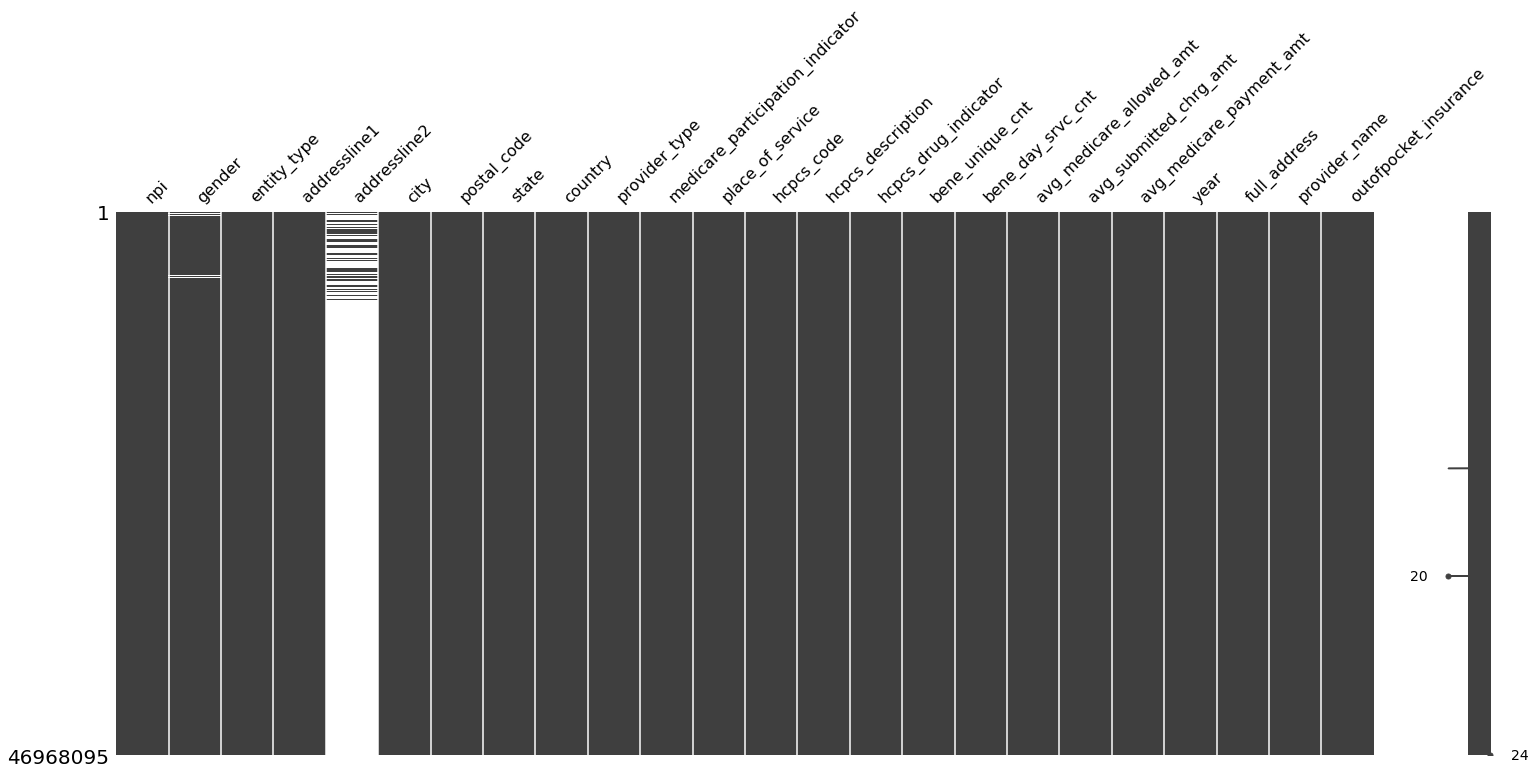

In [54]:
%time msno.matrix(medicare_clean)

In [56]:
# Identify null address
medicare_clean[medicare_clean['full_address'].isnull()]

,npi,gender,entity_type,addressline1,addressline2,city,postal_code,state,country,provider_type,medicare_participation_indicator,place_of_service,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,bene_unique_cnt,bene_day_srvc_cnt,avg_medicare_allowed_amt,avg_submitted_chrg_amt,avg_medicare_payment_amt,year,full_address,provider_name,outofpocket_insurance
115451,1316958416,F,Individual,NaN,NaN,NaN,00000,XX,US,CRNA,Y,F,00740,Anesthesia for procedure on gastrointestinal t...,N,12,12,108.463,637.500,85.035,2014,NaN,PRISCILLA PATTERSON,23.428
115452,1316958416,F,Individual,NaN,NaN,NaN,00000,XX,US,CRNA,Y,F,00810,Anesthesia for procedure on lower intestine us...,N,14,14,139.114,735.714,109.065,2014,NaN,PRISCILLA PATTERSON,30.049
1097,1316958416,F,Individual,NaN,NaN,NaN,00000,XX,US,CRNA,Y,F,00142,Anesthesia for lens surgery,N,22,24,147.741,857.917,107.118,2013,NaN,PRISCILLA PATTERSON,40.623


In [50]:
# Identify Unique States
state_list = medicare_clean['state'].unique()
state_list

array(['MD', 'IL', 'OH', 'PA', 'CO', 'FL', 'OK', 'CA', 'TX', 'OR', 'KY',
       'SC', 'NM', 'MO', 'NY', 'GA', 'MI', 'NJ', 'LA', 'TN', 'MA', 'WA',
       'NH', 'MN', 'ME', 'CT', 'DC', 'NC', 'NV', 'HI', 'MS', 'IA', 'VA',
       'ND', 'IN', 'NE', 'AZ', 'AL', 'PR', 'DE', 'KS', 'RI', 'WI', 'ID',
       'AR', 'MT', 'WV', 'VT', 'AE', 'UT', 'WY', 'SD', 'AK', 'GU', 'VI',
       'MP', 'AA', 'AP', 'XX', 'AS'], dtype=object)

In [51]:
# Record Count for each state
unique_counts = medicare_clean['state'].value_counts()
unique_counts

CA    3645112
FL    3448387
TX    3205984
NY    3000526
PA    2087102
IL    1937886
NC    1731606
OH    1725928
MI    1683117
NJ    1585682
GA    1396247
MA    1290121
TN    1280313
VA    1264607
IN    1046162
MD     990775
MO     976749
WA     941125
WI     911108
AZ     897433
AL     893610
SC     824799
KY     760046
MN     739404
LA     691516
CT     646216
CO     628249
OK     565253
IA     535345
KS     512168
MS     504502
AR     501115
OR     478301
NE     357517
NV     331828
WV     315079
UT     292163
NH     242840
ME     241480
NM     218986
ID     192853
RI     173786
DE     169791
SD     167966
PR     159040
MT     148173
ND     131114
DC     119792
HI     113951
VT      95151
WY      78343
AK      74514
VI       7992
GU       6271
AE        818
AP        814
MP        647
AA        473
XX        178
AS         41
Name: state, dtype: int64

Text(0, 0.5, 'No. of Records')

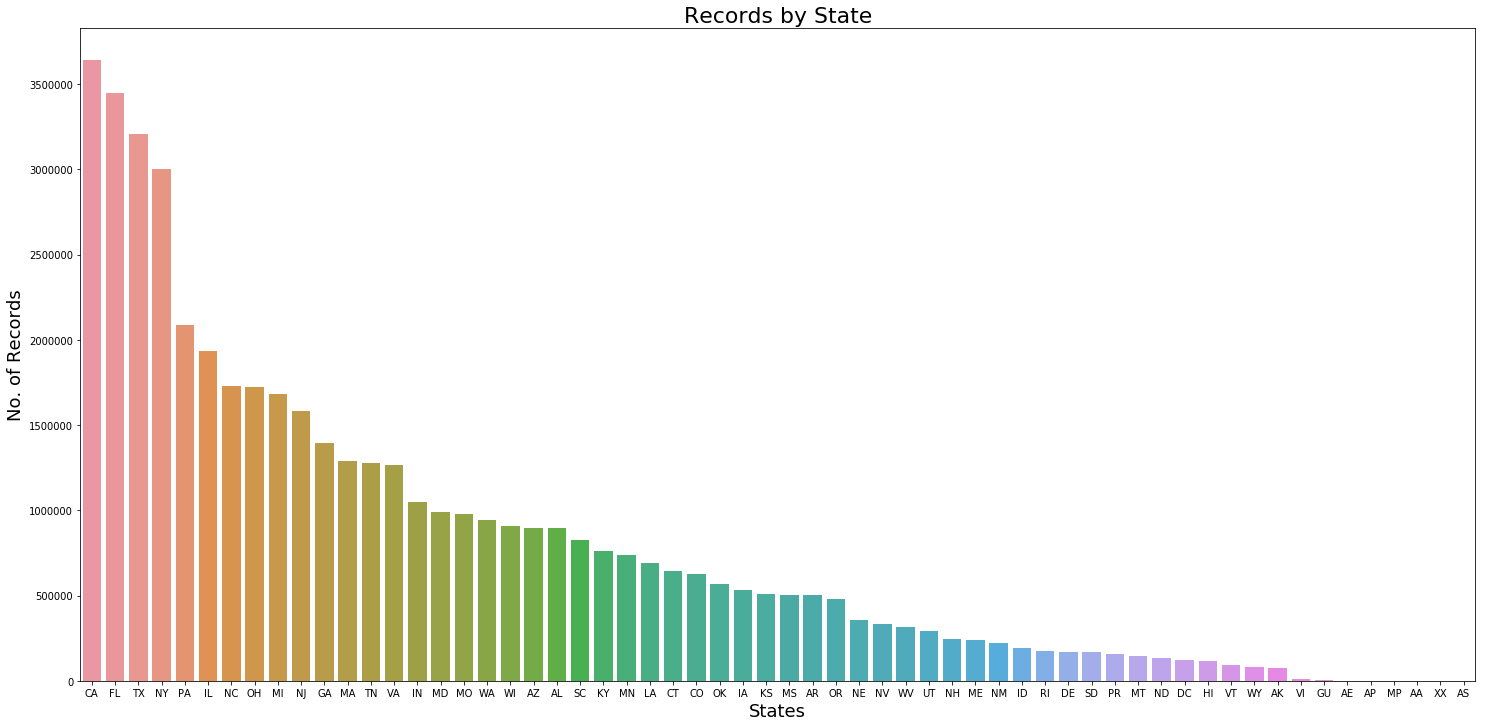

In [61]:
# Plot Record Count by State

plt.figure(figsize=(25,12))
sns.barplot(unique_counts.index, unique_counts.values)
plt.title('Records by State', fontsize=22)
plt.xlabel('States', fontsize=18)
plt.ylabel('No. of Records', fontsize=18)

In [50]:
# Subset data for CA
ca_data = medicare_clean[medicare_clean['state']=='CA']

In [53]:
# Subset data for NY
ny_data = medicare_clean[medicare_clean['state']=='NY']

## Unique Provider Types

In [53]:
# Subset data for unique NPIs
npi_df = medicare_clean[['npi','state','provider_type', 'entity_type']]

In [54]:
# Drop duplicates
unique_df = npi_df.drop_duplicates('npi')
unique_df.head()

,npi,state,provider_type,entity_type
1,1003000126,MD,Internal Medicine,Individual
13,1003000134,IL,Pathology,Individual
24,1003000142,OH,Anesthesiology,Individual
33,1003000407,PA,Family Practice,Individual
51,1003000423,OH,Obstetrics & Gynecology,Individual


#### Look at Count of Provider Types

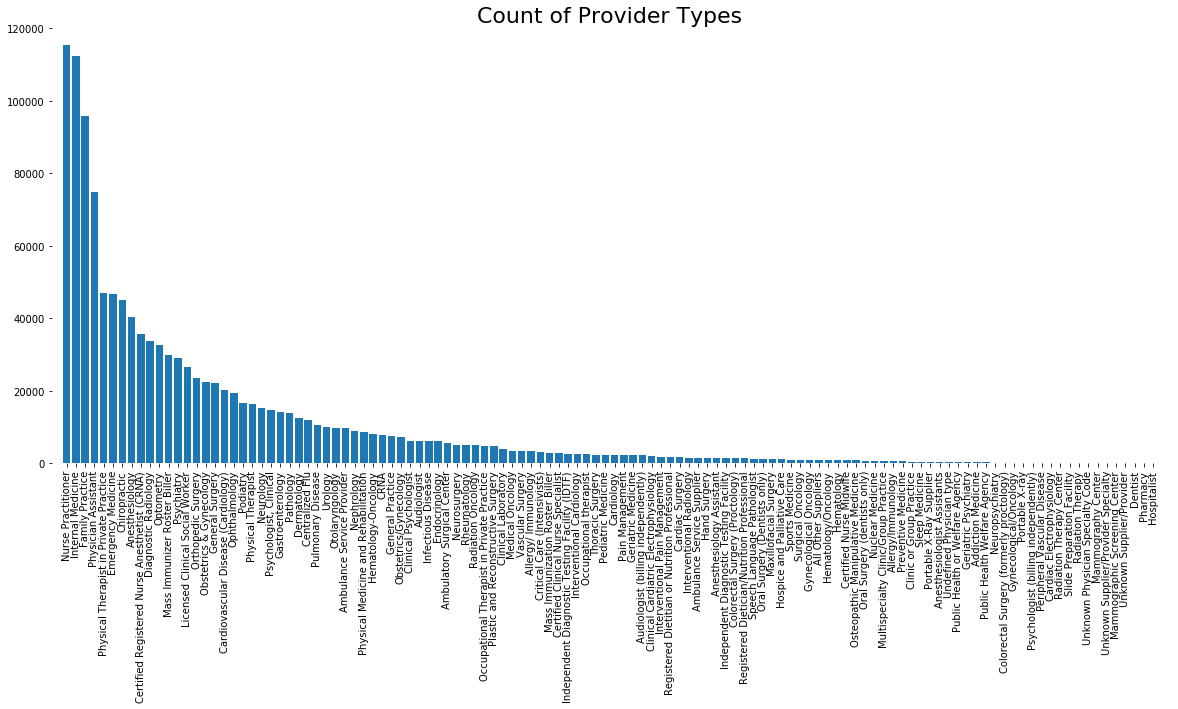

In [209]:
# Count of Provider Types
fig, ax = plt.subplots(figsize=(20,8))
# Add data
provider = unique_df['provider_type'].value_counts().reset_index()
ax.bar(provider.iloc[:,0], provider.iloc[:,1])
# Remove Spines
for key, spine in ax.spines.items():
    spine.set_visible(False)
# Adjust margin, ticks etc and add title    
ax.margins(0.01, 0)
ax.set_ylim(0,120000)
ax.set_title('Count of Provider Types', fontsize=22)
plt.xticks(rotation=90)
# plt.tight_layout()
plt.show()
# plt.figure(figsize=(20,8))
# provider.plot(kind='bar')
# ax.tick_params(bottom=False, top=False, left=False, right=False)
# ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)

#### Top 20 Provider Types in US

C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


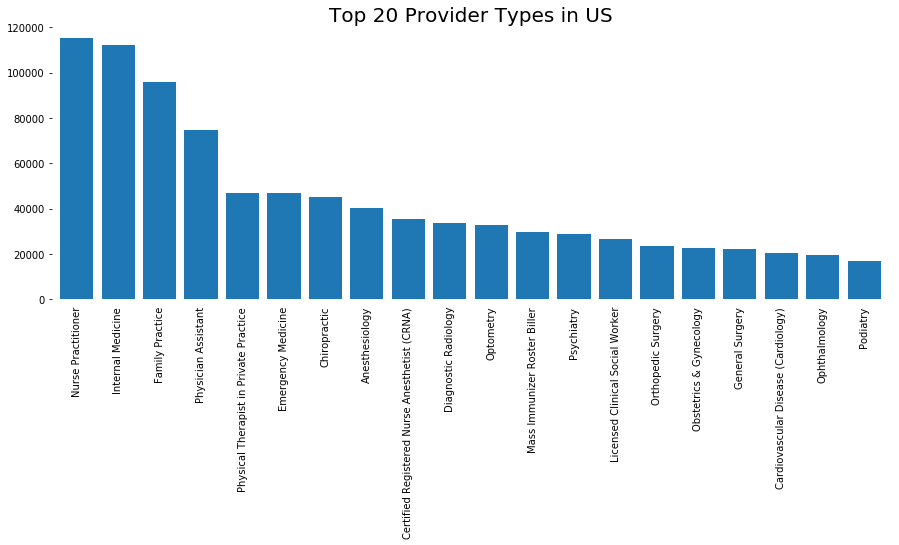

In [193]:
# Top 20 Provider Types in US
fig, ax = plt.subplots(figsize=(15,5))
# provider = unique_df['provider_type'].value_counts().reset_index()
ax.bar(provider.iloc[:20,0], provider.iloc[:20,1])
for key, spine in ax.spines.items():
    spine.set_visible(False)    
ax.margins(0.01, 0)
ax.set_ylim(0,120000)
ax.set_title('Top 20 Provider Types in US', fontsize=20)
plt.xticks(rotation=90)
ax.tick_params(bottom="off")
plt.show()

In [160]:
# plt.figure(figsize=(15,5))
# provider[:20].plot(kind='bar')
# plt.title('Top 20 Provider Types in US', fontsize=20)
# plt.xlabel('Provider Type', fontsize=18)
# plt.ylabel('Count', fontsize=18)

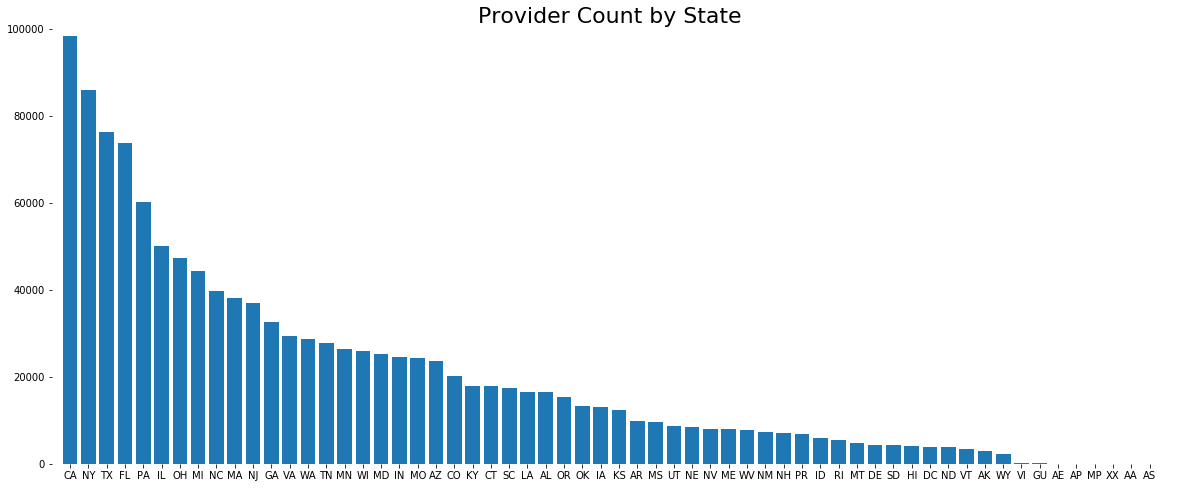

In [161]:
# Unique Providers by State
fig, ax = plt.subplots(figsize=(20,8))
# Add data
provByState = unique_df['state'].value_counts().reset_index()
ax.bar(provByState.iloc[:,0], provByState.iloc[:,1])
# Remove Spines
for key, spine in ax.spines.items():
    spine.set_visible(False)
# Adjust margin, ticks etc and add title    
ax.margins(0.01, 0)
ax.set_ylim(0,100000)
ax.set_title('Provider Count by State', fontsize=22)
plt.show()

From the plot above, we can see that states like CA, NY and TX have the most providers whereas states like VT, AK, WY have the least.

#### Let's look at the top 15 provider types for each of these states

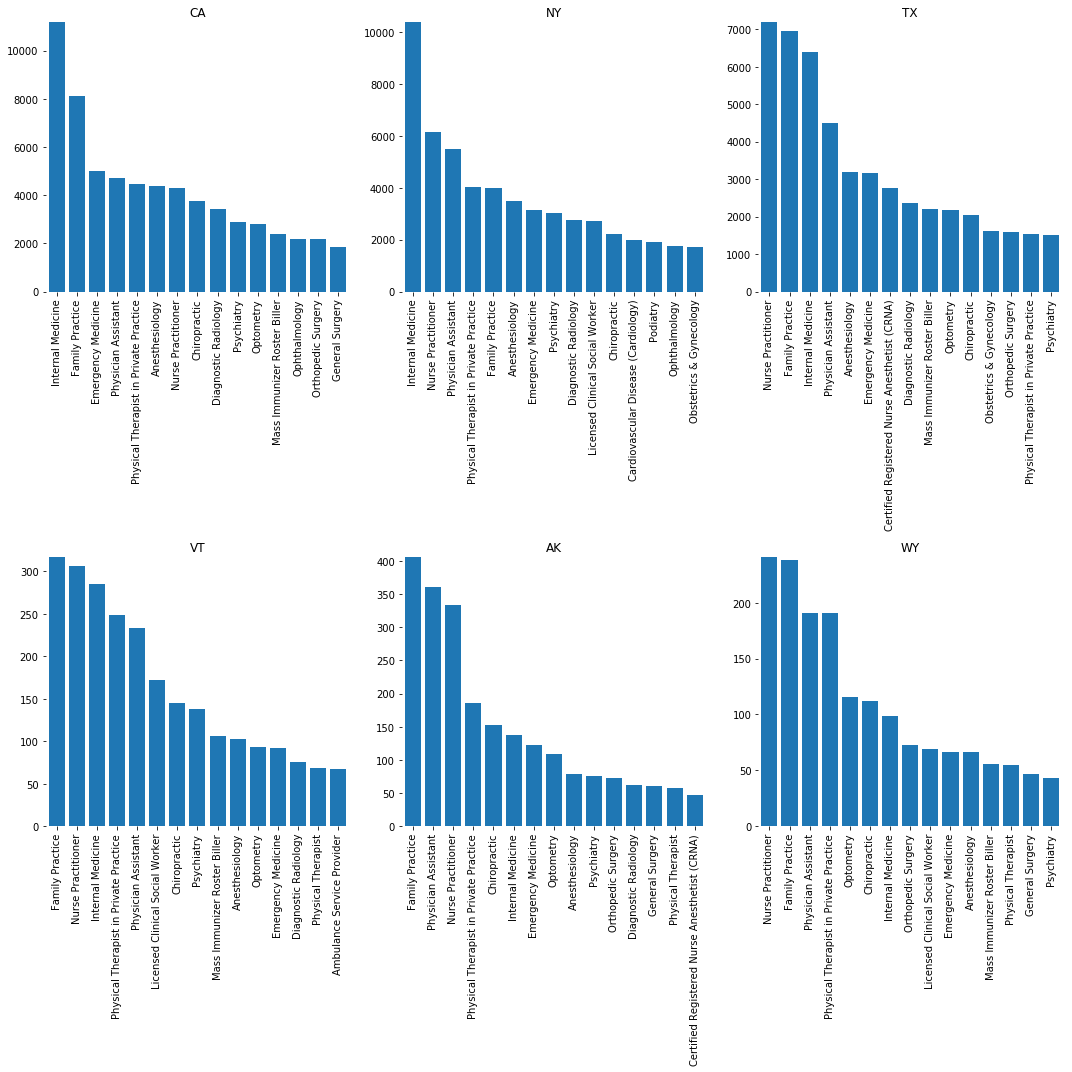

In [211]:
states = ['CA','NY','TX','VT','AK','WY']
fig = plt.figure(figsize=(15, 15))
for sp in range(0,6):
    ax = fig.add_subplot(2,3,sp+1)
    provType = unique_df[unique_df['state']==states[sp]]['provider_type'].value_counts().reset_index()
    ax.bar(provType.iloc[:15,0], provType.iloc[:15,1])
    ax.set_title(states[sp])
    ax.set_ylim(0,provType.iloc[0,1])
    plt.xticks(rotation=90)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.margins(0.01, 0)
plt.tight_layout() # automatically adjusts layout to fit long labels
plt.show()

#### Count of Entity Types in US

C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


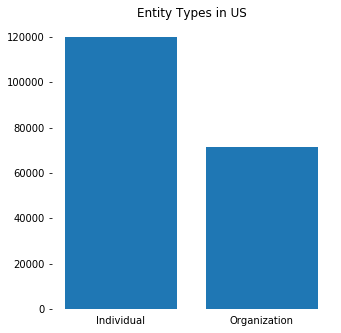

In [192]:
fig, ax = plt.subplots(figsize=(5,5))
entity = unique_df['entity_type'].value_counts().reset_index()
ax.bar(entity.iloc[:,0], entity.iloc[:,1])
for key, spine in ax.spines.items():
    spine.set_visible(False)
ax.set_ylim(0,120000)
ax.set_title('Entity Types in US', pad=20)
ax.tick_params(bottom="off")
plt.show()

#### Comparing Out of Pocket / Insurance expense of ID vs WY

In [86]:
wy_id_data = medicare_clean[(medicare_clean['state']=='WY') | (medicare_clean['state']=='ID')]
wy_id_data.shape

(271196, 24)

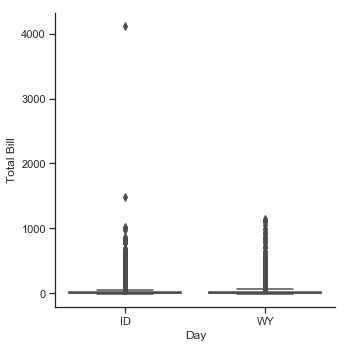

In [87]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("state", "outofpocket_insurance", data=wy_id_data, kind="box")
    g.set_axis_labels("Day", "Total Bill");

In [90]:
wy_id_data.columns

Index(['npi', 'gender', 'entity_type', 'addressline1', 'addressline2', 'city',
       'postal_code', 'state', 'country', 'provider_type',
       'medicare_participation_indicator', 'place_of_service', 'hcpcs_code',
       'hcpcs_description', 'hcpcs_drug_indicator', 'bene_unique_cnt',
       'bene_day_srvc_cnt', 'avg_medicare_allowed_amt',
       'avg_submitted_chrg_amt', 'avg_medicare_payment_amt', 'year',
       'full_address', 'provider_name', 'outofpocket_insurance'],
      dtype='object')

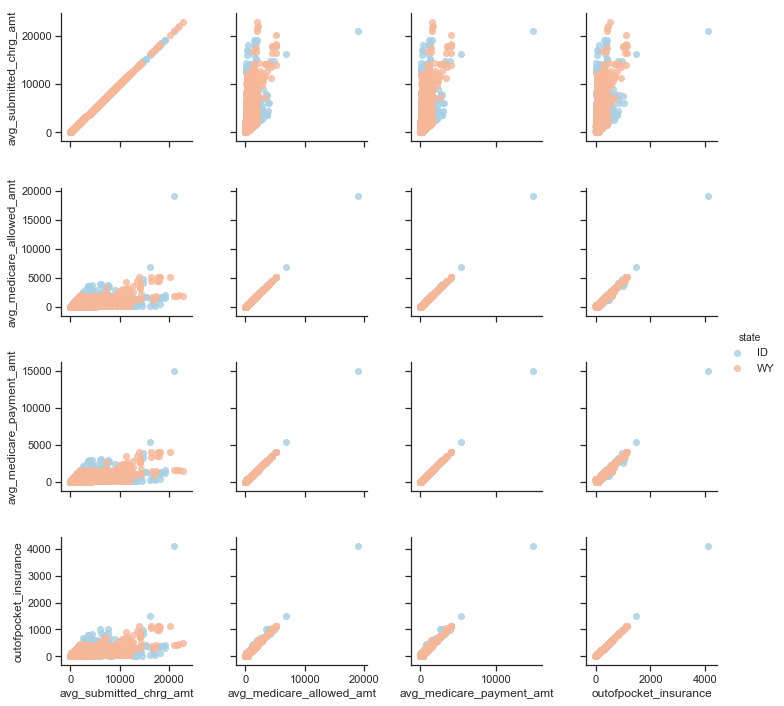

In [91]:
g = sns.PairGrid(wy_id_data, vars=['avg_submitted_chrg_amt','avg_medicare_allowed_amt','avg_medicare_payment_amt','outofpocket_insurance'],
                 hue='state', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

### Export Data

In [105]:
for stateName in state_list:
    name = stateName
    i = medicare_clean[medicare_clean['state']==stateName]
    i.to_csv('medicare_'+name+'.csv', index = None, header=True)

In [102]:
# Create output path
output_path = os.path.join(os.getcwd(), 'medicare_clean_data')
output_path

'C:\\Users\\mohi9282\\Desktop\\arcgis\\Datasets\\Medicare Provider Payment Data\\medicare_clean_data'

In [104]:
# Create csv files for each state
for stateName in state_list:
    name = stateName
    df = medicare_clean[medicare_clean['state']==stateName]
    file_name = os.path.join(output_path, 'medicare_'+name+'.csv')
    df.to_csv(file_name, index = None, header=True)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\mohi9282\\Desktop\\arcgis\\Datasets\\Medicare Provider Payment Data\\medicare_clean_data\\medicare_MD.csv'

## Using GIS

In [75]:
from IPython.display import display
import arcgis
from arcgis.gis import GIS
from arcgis.geocoding import geocode
from arcgis.geoanalytics import get_datastores

In [76]:
# gis = GIS("https://www.arcgis.com", "mohitagr18", "Maverick@18")
gis = GIS("https://datascienceqa.esri.com/portal", "portaladmin", "esri.agp", verify_cert=False)

In [77]:
datastores = get_datastores()
bigdata_fileshare = datastores.search()
bigdata_fileshare

[<Datastore title:"/bigDataFileShares/dask_healthcare_data" type:"bigDataFileShare">]

In [78]:
data_item = bigdata_fileshare[0]

In [79]:
# Get datasets within the big data file share
datasets = data_item.manifest['datasets']
len(datasets)

4

In [80]:
[dataset['name'] for dataset in datasets]

['sample_test_GAserver',
 'medicare_clean_data',
 'provider_clean_data',
 'medical_provider_data']

In [81]:

datasets[1]

{'name': 'medicare_clean_data',
 'format': {'quoteChar': '"',
  'fieldDelimiter': ',',
  'hasHeaderRow': True,
  'encoding': 'UTF-8',
  'escapeChar': '"',
  'recordTerminator': '\n',
  'type': 'delimited',
  'extension': 'csv'},
 'schema': {'fields': [{'name': 'npi', 'type': 'esriFieldTypeBigInteger'},
   {'name': 'gender', 'type': 'esriFieldTypeString'},
   {'name': 'entity_type', 'type': 'esriFieldTypeString'},
   {'name': 'addressline1', 'type': 'esriFieldTypeString'},
   {'name': 'addressline2', 'type': 'esriFieldTypeString'},
   {'name': 'city', 'type': 'esriFieldTypeString'},
   {'name': 'postal_code', 'type': 'esriFieldTypeBigInteger'},
   {'name': 'state', 'type': 'esriFieldTypeString'},
   {'name': 'country', 'type': 'esriFieldTypeString'},
   {'name': 'provider_type', 'type': 'esriFieldTypeString'},
   {'name': 'medicare_participation_indicator', 'type': 'esriFieldTypeString'},
   {'name': 'place_of_service', 'type': 'esriFieldTypeString'},
   {'name': 'hcpcs_code', 'type': '

In [82]:
# Search for big data file share using content search
search_result = gis.content.search('', item_type='big data file share')
search_result

[<Item title:"bigDataFileShares_dask_healthcare_data" type:Big Data File Share owner:portaladmin>]

In [83]:
# Get all data layers in the file share
d_item = search_result[0]
d_item.layers

[<Layer url:"https://dev0008498.esri.com/server/rest/services/DataStoreCatalogs/bigDataFileShares_dask_healthcare_data/BigDataCatalogServer/sample_test_GAserver">,
 <Layer url:"https://dev0008498.esri.com/server/rest/services/DataStoreCatalogs/bigDataFileShares_dask_healthcare_data/BigDataCatalogServer/medicare_clean_data">,
 <Layer url:"https://dev0008498.esri.com/server/rest/services/DataStoreCatalogs/bigDataFileShares_dask_healthcare_data/BigDataCatalogServer/provider_clean_data">,
 <Layer url:"https://dev0008498.esri.com/server/rest/services/DataStoreCatalogs/bigDataFileShares_dask_healthcare_data/BigDataCatalogServer/medical_provider_data">]

In [66]:
# Select the medicare data layer
medicare_data = d_item.layers[0]
medicare_data

<Layer url:"https://dev0008498.esri.com/server/rest/services/DataStoreCatalogs/bigDataFileShares_dask_healthcare_data/BigDataCatalogServer/medicare_clean_data">

In [74]:
for lyr in d_item.layers:
    print(lyr.properties.name)

medicare_clean_data
provider_clean_data
medical_provider_data


In [78]:
medicare_data.properties['fields']

[{'name': 'npi', 'type': 'esriFieldTypeInteger'},
 {'name': 'gender', 'type': 'esriFieldTypeString'},
 {'name': 'entity_type', 'type': 'esriFieldTypeString'},
 {'name': 'addressline1', 'type': 'esriFieldTypeString'},
 {'name': 'addressline2', 'type': 'esriFieldTypeString'},
 {'name': 'city', 'type': 'esriFieldTypeString'},
 {'name': 'postal_code', 'type': 'esriFieldTypeInteger'},
 {'name': 'state', 'type': 'esriFieldTypeString'},
 {'name': 'country', 'type': 'esriFieldTypeString'},
 {'name': 'provider_type', 'type': 'esriFieldTypeString'},
 {'name': 'medicare_participation_indicator', 'type': 'esriFieldTypeString'},
 {'name': 'place_of_service', 'type': 'esriFieldTypeString'},
 {'name': 'hcpcs_code', 'type': 'esriFieldTypeInteger'},
 {'name': 'hcpcs_description', 'type': 'esriFieldTypeString'},
 {'name': 'hcpcs_drug_indicator', 'type': 'esriFieldTypeString'},
 {'name': 'bene_unique_cnt', 'type': 'esriFieldTypeInteger'},
 {'name': 'bene_day_srvc_cnt', 'type': 'esriFieldTypeInteger'},
 {

In [68]:
medicare_data[0]

TypeError: 'Layer' object is not subscriptable

In [2]:
conda install missingno

Solving environment: ...working... failed

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - missingno

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/free/win-64
  - https://repo.anaconda.com/pkgs/free/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [3]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.
